## Boundary Value Problem


## #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

height = 60
distance = 60
time = 5

In [2]:
v_x = distance/time
print ('x component of velocity is:', v_x)

x component of velocity is: 12.0


In [3]:
v_y = (height / time) + ((1/2) * (9.8) * time)
print ('y component of velocity is :', v_y)

y component of velocity is : 36.5


Text(0.5, 0, 'Distance (m)')

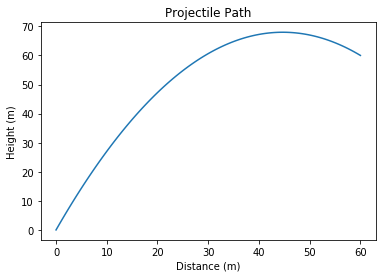

In [4]:
time_array = np.linspace(0,5,100)

x_position = time_array * v_x
y_position = v_y * time_array - 0.5*(9.8)*time_array**2

        
plt.plot(x_position,y_position)
plt.title('Projectile Path')
plt.ylabel('Height (m)')
plt.xlabel('Distance (m)')

## 2

In [5]:
import numpy as np


def rk4(d,v,t,g,hei):
    n = len(t)
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

hei = 60
ti = 10
d = 25
g = 9.81
x_0 = 0
y_0 = 0



solution = np.array([x_0, y_0,v_x1, v_y1])
t_RK = np.linspace(0, 10, 100)

def f(x_1, t):
    return np.array([x_1[2], x_1[3], x_1[0]/ti, (x_1[1]/ti) + (1/2)*g*ti ])


sol = rk4(f, g, hei, solution, t_RK)

vel_x_rk = sol[:,2]
vel_y_rk = sol[:,3]

plt.plot(vel_x_rk, vel_y_rk)

NameError: name 'v_x1' is not defined

Text(0, 0.5, 'Height (m)')

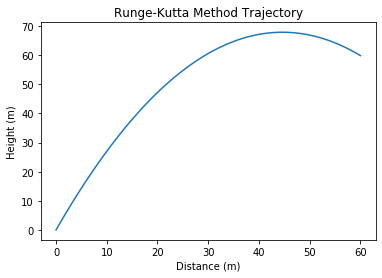

In [6]:
import scipy
from scipy import integrate



hei = 60
time_array = [0,5]
d = 60
g = 9.81
#x_0 = 0
#y_0 = 0
time_space = np.linspace(0,5,100)

s0 = [x_0,y_0,v_x,v_y]

def f(t,s):
    return [s[2], s[3], 0, -g]

sol_2 = scipy.integrate.solve_ivp(fun = f, t_span = time_array, y0 = s0,t_eval = time_space)

x_pos = sol_2.y[0]
y_pos = sol_2.y[1]

plt.plot(x_pos, y_pos)
plt.title('Runge-Kutta Method Trajectory')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')

## Iterative Method w/o Drag

In [7]:
from scipy.optimize import fsolve

#v_x = distance / time

#v_y = (y/t) + (1/2)*g*t

#time = np.array([])
#t_0 = 0
#t_f = 10
d_it = 60
h_it = 60


def func(guess):
    v_x, v_y = guess
    s0 = [0, 0, v_x, v_y]
    def f(t,s):
        return [s[2], s[3], 0, -g]
    time_array = [0,5]
    time_space = np.linspace(0,5,100)
    sol = scipy.integrate.solve_ivp(fun = f, t_span = time_array, y0 = s0,t_eval = time_space)
    x_diff = sol.y[0][-1] - d_it
    y_diff = sol.y[1][-1] - h_it
    return [x_diff, y_diff]

roots = fsolve(func, [10,10])

print(roots)


[12.    36.525]


## Iterative and Runge Kutta w/ Air resistance

In [9]:
d_it = 60
h_it = 60
c = 0.015

def funct(guess):
    v_x, v_y = guess
    s0 = [0, 0, v_x, v_y]
    def fu(t,w):
        return [w[2], w[3], -c*w[2]**2, -g - (c*w[3]**2)]
    time_array = [0,5]
    time_space = np.linspace(0,5,100)
    sol = scipy.integrate.solve_ivp(fun = fu, t_span = time_array, y0 = s0,t_eval = time_space, rtol = 0.0000001, atol = 1e-8)
    x_diff = sol.y[0][-1] - d_it
    y_diff = sol.y[1][-1] - h_it
    return [x_diff, y_diff]

roots = fsolve(funct,[5,45])

print(roots)

[19.46137482 76.14649021]


Text(0, 0.5, 'Height (m)')

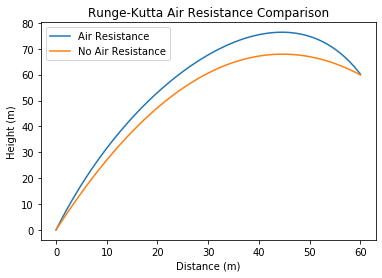

In [10]:
import scipy
from scipy import integrate
import numpy as np

time_array = [0,5]
time_space = np.linspace(0,5,100)
def f(t,s):
    g = 9.81
    return [s[2], s[3], -c*s[2]**2, -g - (c*s[3]**2)]

s0 = [x_0,y_0,19.46137482,76.14649021]
sol_1 = scipy.integrate.solve_ivp(fun = f, t_span = time_array, y0 = s0,t_eval = time_space)
x_pos_1 = sol_1.y[0]
y_pos_1 = sol_1.y[1]

plt.figure(1)
plt.plot(x_pos_1, y_pos_1, label = 'Air Resistance')
plt.plot(x_pos,y_pos, label = 'No Air Resistance')
plt.title('Runge-Kutta Air Resistance Comparison')
plt.legend()
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')

## Gravity Assist

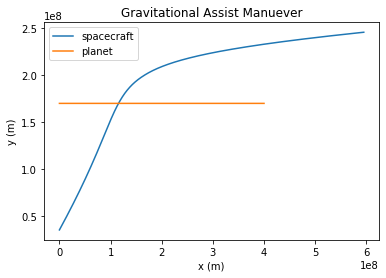

In [133]:
#SATURN

mass = 5.683 * 10**26 #kg
m = 1000
#radius  = 58.232 * 10**6  #meters
#KE = (1/2)* mass * velocity
#PE = -(G/radius)
G = 6.674 * 10**-11

x_sc = 0
y_sc = 20*11**6
v_x_sc = 30*10**3
v_y_sc = 30*10**3
x_plan = 0
y_plan = 170*10**6
v_x_plan = 40*10**3
v_y_plan = 0


s0_grav = [x_sc, y_sc, v_x_sc, v_y_sc, x_plan,y_plan,v_x_plan,v_y_plan]




def GravityAssist(t,s):
    r = np.sqrt((s[0] - s[4])**2 + (s[1] - s[5])**2)
    return [s[2],s[3],-(G*mass*(s[0] - s[4]) / r **3), -(G*mass*(s[1] - s[5]) / r **3), s[6],s[7],0,0 ]


time_space = [0,10000]
time_range = np.linspace(0,10000,7000)


sol_grav = scipy.integrate.solve_ivp(fun = GravityAssist, t_span = time_space, y0 = s0_grav,t_eval = time_range)


x_pos_sc = sol_grav.y[0]
y_pos_sc = sol_grav.y[1]


x_pos_plan = sol_grav.y[4]
y_pos_plan = sol_grav.y[5]

plt.plot(x_pos_sc,y_pos_sc,  label = 'spacecraft')
plt.plot(x_pos_plan, y_pos_plan, label = 'planet')
plt.title('Gravitational Assist Manuever')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

25167.500496171524


Text(0, 0.5, 'Velocity (km/s)')

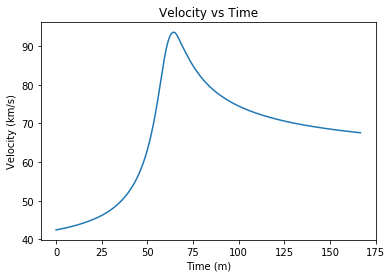

In [134]:
total_velocity =np.sqrt((sol_grav.y[2])**2 + (sol_grav.y[3])**2)

velocity_difference = total_velocity[-1] - total_velocity[0]
print(velocity_difference)

plt.plot(time_range / 60,total_velocity/1000)
plt.title('Velocity vs Time')
plt.xlabel('Time (m)')
plt.ylabel('Velocity (km/s)')

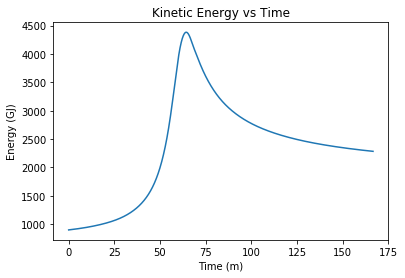

In [137]:
v_km = total_velocity
KE = (1/2)* m * (v_km**2)
#PE = -(G/r)

KE_diff = KE[-1] - KE[0]

plt.plot(time_range / 60, KE * 10**-9)
plt.title('Kinetic Energy vs Time')
plt.xlabel('Time (m)')
plt.ylabel('Energy (GJ)')

x_pos_sc = sol_grav.y[0]
y_pos_sc = sol_grav.y[1]

x_pos_plan = sol_grav.y[4]
y_pos_plan = sol_grav.y[5]



Text(0, 0.5, 'Energy (GJ)')

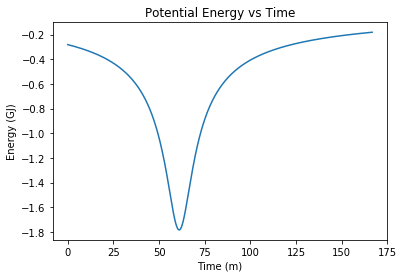

In [117]:
r_1 = np.sqrt((x_pos_sc - x_pos_plan)**2 + (y_pos_sc - y_pos_plan)**2)

PE = -G * mass /r_1

PE_diff = PE[-1] - PE[0]

plt.plot(time_range / 60, PE*10**-9)
plt.title('Potential Energy vs Time')
plt.xlabel('Time (m)')
plt.ylabel('Energy (GJ)')

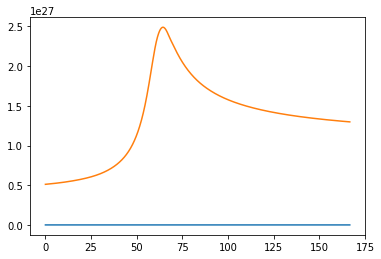

In [102]:
plt.plot(time_range / 60, PE*10**-9)
plt.plot(time_range / 60, KE * 10**-9)


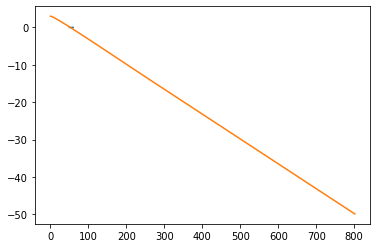

In [140]:
chi = 5

v_plan = 10**3

s0_gravity = [0, 3*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_gravity = scipy.integrate.solve_ivp(fun = GravityAssist, t_span = time_space, y0 = s0_gravity, t_eval = time_range, rtol = 0.0000001, atol = 1*10**8)

v_1_sat = np.sqrt(sol_gravity.y[2]**2 + sol_gravity.y[3]**2)


deflection_angle_3k = np.arctan2(sol_gravity.y[3][0], sol_gravity.y[2][0]) - np.arctan2(sol_gravity.y[3][-1], sol_gravity.y[2][-1])

plt.plot(sol_gravity.y[4] / 10**6, sol_gravity.y[5] / 10**6, label = 'Planet')
plt.plot(sol_gravity.y[0] / 10**6, sol_gravity.y[1] / 10**6, label = '3k km')


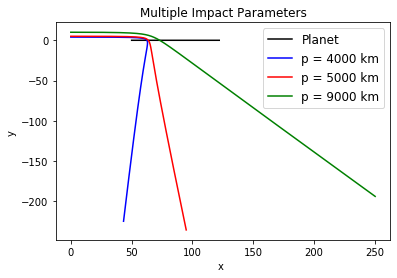

In [175]:
M = 10**(26)
m = 1000
G = 6.67408 * (10**(-11))
t_eval_GA = np.linspace(0,8000,30000)

import scipy as sp

def f_GA(t, s):
    # s0    s1     s2      s3      s4       s5      s6       s7 
    x_sat, y_sat, vx_sat, vy_sat, x_plan, y_plan, vx_plan, vy_plan = s
    r_sat = np.sqrt((s[0] - s[4])**2 + (s[1] - s[5])**2)
    return [s[2], s[3], -G*M*(s[0]-s[4]) / (r_sat**3), -G*M*(s[1]-s[5]) / (r_sat**3), s[6], s[7], 0, 0]

#figure(figsize=(8, 6), dpi=80)
plt.figure(1)
chi = 5

v_plan = 9*10**3


s0_GA = [0, 4*10**6,chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
v_1_sat = np.sqrt(sol_GA.y[2]**2 + sol_GA.y[3]**2)

deflectionAngle_3000 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])

plt.plot(sol_GA.y[4] / 10**(6), sol_GA.y[5] / 10**(6), color = 'black', label = 'Planet')
plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'blue', label = 'p = 4000 km')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6), color = 'blue')
plt.plot(sol_GA.y[4][-1] / 10**(6), sol_GA.y[5][-1] / 10**(6), color = 'black')

s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
v_2_sat = np.sqrt(sol_GA.y[2]**2 + sol_GA.y[3]**2)
deflectionAngle_5000 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])


plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'red', label = 'p = 5000 km')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6), color = 'red')

s0_GA = [0,10*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
v_3_sat = np.sqrt(sol_GA.y[2]**2 + sol_GA.y[3]**2)
deflectionAngle_10000 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])


plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'green', label = 'p = 9000 km')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6), color = 'green')

s0_GA = [0,15*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
v_4_sat = np.sqrt(sol_GA.y[2]**2 + sol_GA.y[3]**2)
deflectionAngle_15000 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])


#plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'orange', label = 'p = 15000 km')
#plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6), color = 'orange')

plt.title('Multiple Impact Parameters')
plt.xlabel('x ')
plt.ylabel('y ')
#plt.xticks(fontsize = 12)
#plt.yticks(fontsize = 12)

plt.legend(fontsize = 12)


plt.show()

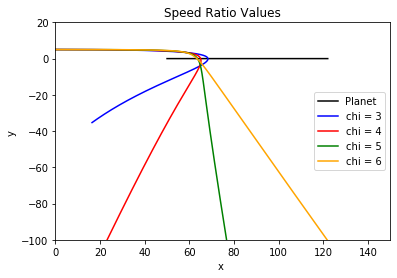

In [185]:
#figure(figsize=(8, 6), dpi=80)
plt.figure(1)

chi = 3
s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
deflectionAngle_3 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])

plt.plot(sol_GA.y[4] / 10**(6), sol_GA.y[5] / 10**(6), color = 'black', label = 'Planet')
plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'blue', label = 'chi = 3')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6),  color = 'blue')
plt.plot(sol_GA.y[4][-1] / 10**(6), sol_GA.y[5][-1] / 10**(6),  color = 'black')

chi = 4
s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
deflectionAngle_4 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])
plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'red', label = 'chi = 4')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6),  color = 'red')

chi = 5
s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
deflectionAngle_5 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])
plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'green', label = 'chi = 5')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6),  color = 'green')

chi = 6
s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
deflectionAngle_6 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])
plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'orange', label = 'chi = 6')
plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6),  color = 'orange')

#chi = 8
#s0_GA = [0,5*10**6, chi*v_plan, 0, 50*10**6, 0, v_plan, 0]
#sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA, t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
#deflectionAngle_8 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])
#plt.plot(sol_GA.y[0] / 10**(6), sol_GA.y[1] / 10**(6), color = 'purple', label = 'chi = 8')
#plt.plot(sol_GA.y[0][-1] / 10**(6), sol_GA.y[1][-1] / 10**(6), 'o', color = 'purple')

plt.title('Speed Ratio Values')
plt.xlabel('x ')
plt.ylabel('y ')
#plt.xticks()
#plt.yticks()
plt.legend()

plt.ylim(-100, 20)
plt.xlim(0, 150)

plt.show()

#chi = 7
#s0_GA = [0,  5E6, chi*v_plan, 0, 50E6, 0, v_plan, 0]
#sol_GA = sp.integrate.solve_ivp(fun = f_GA, t_span = [t_eval_GA[0], t_eval_GA[-1]], y0 = s0_GA,t_eval = t_eval_GA, rtol = 0.0000001, atol = 1e-8)
#deflectionAngle_7 = np.arctan2(sol_GA.y[3][0], sol_GA.y[2][0])-np.arctan2(sol_GA.y[3][-1], sol_GA.y[2][-1])